In [1]:
import pandas as pd

In [13]:
intra15_1 = pd.read_csv('Smc1_3hpm_2MIC_rep1_intra.txt',delimiter = '\t',header = 0,index_col=False,names=['chr','start','end','value'])
intra15_2 = pd.read_csv('Smc1_3hpm_2MIC_rep2_intra.txt',delimiter = '\t',header = 0,index_col=False,names=['chr','start','end','value'])
inter15_1 = pd.read_csv('Smc1_3hpm_2MIC_rep1_inter.txt',delimiter = '\t',header = 0,index_col=False,names=['chr','start','end','value'])
inter15_2 = pd.read_csv('Smc1_3hpm_2MIC_rep2_inter.txt',delimiter = '\t',header = 0,index_col=False,names=['chr','start','end','value'])

In [3]:
intra15_1.iloc[:5,:]

,chr,start,end,value
0,chr1,2200000,2200000,1.138490
1,chr1,2190000,2210000,0.876408
2,chr1,2200000,2210000,1.220234
3,chr1,2210000,2210000,0.894551
4,chr1,2190000,2220000,0.771386


In [3]:
def ps(data):
    data['d'] = data.end - data.start
    data_sum = data.groupby('d').sum().reset_index()
    data_sum.value = data_sum.value/sum(data_sum.value)
    return(data_sum)
    

In [14]:
intra15_1sum = ps(intra15_1)
intra15_2sum = ps(intra15_2)
inter15_1sum = ps(inter15_1)
inter15_2sum = ps(inter15_2)

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
f,ax = plt.subplots()
ax.set(xscale='log',yscale='log')
sns.regplot('d','value',intra15_1,scatter_kws={'s':10000})

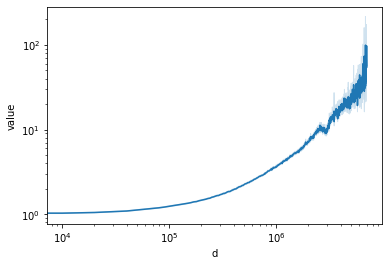

In [6]:
f,ax = plt.subplots()
ax.set(xscale='log',yscale='log')
sns.lineplot(x='d',y='value',data=intra15_1)

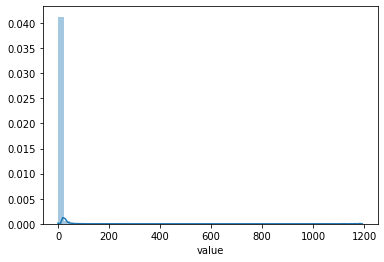

In [13]:
sns.distplot(intra15_1.value[~np.isnan(intra15_1.value)])

In [9]:
inter15_1 = pd.read_csv('Cell_1.5hpm_2MIC_rep1_inter.txt',delimiter = '\t',header = 0,index_col=False,names=['chr','start','end','value'])

In [10]:
inter15_1['d'] = inter15_1.end - inter15_1.start

Text(0.5, 1.0, 'Smc1 3hpm')

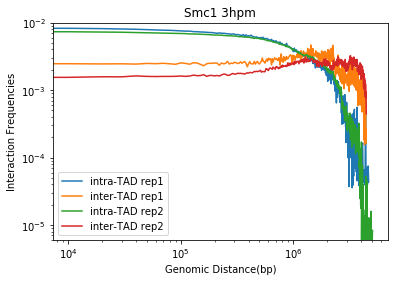

In [15]:
f,ax = plt.subplots()
ax.set(xscale='log',yscale='log')
sns.lineplot(x='d',y='value',data=intra15_1sum,label='intra-TAD rep1')
sns.lineplot(x='d',y='value',data=inter15_1sum,label='inter-TAD rep1')
sns.lineplot(x='d',y='value',data=intra15_2sum,label='intra-TAD rep2')
sns.lineplot(x='d',y='value',data=inter15_2sum,label='inter-TAD rep2')
plt.ylim(6*10**(-6),10**(-2))
plt.xlabel('Genomic Distance(bp)')
plt.ylabel('Interaction Frequencies')
plt.title('Smc1 3hpm')

In [6]:
intra15_1sum = intra15_1.groupby('d').sum().reset_index()

In [7]:
intra15_1sum.value = intra15_1sum.value/sum(intra15_1sum.value)

In [11]:
inter15_1sum = inter15_1.groupby('d').sum().reset_index()
inter15_1sum.value = inter15_1sum.value/sum(inter15_1sum.value)